In [6]:
import os
import numpy as np
from cmdstanpy import cmdstan_path, CmdStanModel

import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions

In [7]:
import cmdstanpy
cmdstanpy.install_cmdstan()

Installing CmdStan version: 2.31.0
Install directory: /Users/andrea/.cmdstan
CmdStan version 2.31.0 already installed


True

In [8]:
import pandas as pd

source = "../ames iowa/full.csv"
df = pd.read_csv(source)
df = df.loc[:, ["price", "Overall.Qual", "Half.Bath", "Garage.Area", "Total.Bsmt.SF", "X1st.Flr.SF",
                "Yr.Sold", "Year.Built",  "Mas.Vnr.Area", "TotRms.AbvGrd", "Fireplaces",
                "Wood.Deck.SF", "Full.Bath"]]
df = df.assign(AgeOfHouse= (df.loc[:, "Yr.Sold"] - df.loc[:, "Year.Built"]))
df = df.dropna()
df

,price,Overall.Qual,Half.Bath,Garage.Area,Total.Bsmt.SF,X1st.Flr.SF,Yr.Sold,Year.Built,Mas.Vnr.Area,TotRms.AbvGrd,Fireplaces,Wood.Deck.SF,Full.Bath,AgeOfHouse
0,215000,6,0,528.0,1080.0,1656,2010,1960,112.0,7,2,210,1,50
1,105000,5,0,730.0,882.0,896,2010,1961,0.0,5,0,140,1,49
2,172000,6,1,312.0,1329.0,1329,2010,1958,108.0,6,0,393,1,52
3,244000,7,1,522.0,2110.0,2110,2010,1968,0.0,8,2,0,2,42
4,189900,5,1,482.0,928.0,928,2010,1997,0.0,6,1,212,2,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,142500,6,0,588.0,1003.0,1003,2006,1984,0.0,6,0,120,1,22
2926,131000,5,0,484.0,864.0,902,2006,1983,0.0,5,0,164,1,23
2927,132000,5,0,0.0,912.0,970,2006,1992,0.0,6,0,80,1,14
2928,170000,5,0,418.0,1389.0,1389,2006,1974,0.0,6,1,240,1,32


In [9]:
stan_model = CmdStanModel(stan_file="./bsts.stan")

11:11:52 - cmdstanpy - INFO - compiling stan file /Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/progetto/BSTS Analysis/bsts.stan to exe file /Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/progetto/BSTS Analysis/bsts
INFO:cmdstanpy:compiling stan file /Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/progetto/BSTS Analysis/bsts.stan to exe file /Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/progetto/BSTS Analysis/bsts
DEBUG:cmdstanpy:cmd: make /tmp/tmptnbjupa0/tmpblvgij2l
cwd: /Users/andrea/.cmdstan/cmdstan-2.31.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc  --o=/tmp/tmptnbjupa0/tmpblvgij2l.hpp /tmp/tmptnbjupa0/tmpblvgij2l.stan
Warning in '/tmp/tmptnbjupa0/tmpblvgij2l.stan', line 5, column 4:

In [10]:
features = df.loc[:, ["Overall.Qual", "Garage.Area", "Total.Bsmt.SF", "X1st.Flr.SF",
                "AgeOfHouse",  "Mas.Vnr.Area", "TotRms.AbvGrd", "Fireplaces",
                "Wood.Deck.SF", "Full.Bath"]]
                
data = {
    "N": df.shape[0],
    "p": features.shape[1],
    "Y": np.log(df.loc[:, "price"]),
    "X": features,
    "year": df.loc[:, "Yr.Sold"],
    "tau_ss": 0.1,
    "c_ss": 100,
    "sigma_max": 200
}

stan_fit = stan_model.sample(data=data, chains=6, 
                             parallel_chains=6, 
                             iter_warmup=2000, iter_sampling=15000, thin=3)

cmdstanpy_data = az.from_cmdstanpy(stan_fit)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp36_fipz3/pkql5crb.json
DEBUG:cmdstanpy:cmd: /Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/progetto/BSTS Analysis/bsts info
cwd: None
11:11:58 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

chain 6 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 4
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/progetto/BSTS Analysis/bsts', 'id=5', 'random', 'seed=38141', 'data', 'file=/tmp/tmp36_fipz3/pkql5crb.json', 'output', 'file=/tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_5.csv', 'method=sample', 'num_samples=15000', 'num_warmup=2000', 'thin=3', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/progetto/BSTS Analysis/bsts', 'id=1', 'random', 'seed=38141', 'data', 'file=/tmp/tmp36_fipz3/pkql5crb.json', 'output', 'file=/tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_1.csv', 'method=sample', 'num_samples=

12:00:04 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=6, chain_ids=[1, 2, 3, 4, 5, 6], num_processes=6
 cmd (chain 1):
	['/Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/progetto/BSTS Analysis/bsts', 'id=1', 'random', 'seed=38141', 'data', 'file=/tmp/tmp36_fipz3/pkql5crb.json', 'output', 'file=/tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_1.csv', 'method=sample', 'num_samples=15000', 'num_warmup=2000', 'thin=3', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_1.csv
 console_msgs (if any):
	/tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 15000
    num_warmup = 2000
    save_warmup = 0 (Default)
    thin = 3
    adap

In [14]:
import pickle

# Save the result on disk
with open('bsts-stan-results.pickle', 'wb') as f:
    pickle.dump(stan_fit,f)

In [11]:
print(stan_fit.diagnose())

DEBUG:cmdstanpy:cmd: /Users/andrea/.cmdstan/cmdstan-2.31.0/bin/diagnose /tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_1.csv /tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_2.csv /tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_3.csv /tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_4.csv /tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_5.csv /tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_6.csv
cwd: None


Processing csv files: /tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_1.csv, /tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_2.csv, /tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_3.csv, /tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_4.csv, /tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_5.csv, /tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_6.csv

Checking sampler transitions treedepth.
29886 of 30000 (99.62%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

The following parameters had split R-hat greater than 1.05:
  a
Such high values indicate incomplete mixing and biased estimation.
You should consider regul

In [12]:
# The MCMC results are very good, except for the parameter a, but that parameter
# represents the ratio of the means of the Ds, since the Ds are estimated to be 
# very close to 0 it is reasonable that the parameter a cannot be reliably
# estimated.
stan_fit.summary()

DEBUG:cmdstanpy:cmd: /Users/andrea/.cmdstan/cmdstan-2.31.0/bin/stansummary --percentiles= 5,50,95 --sig_figs=6 --csv_filename=/tmp/tmp36_fipz3/stansummary-bsts-ti4pq1jh.csv /tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_1.csv /tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_2.csv /tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_3.csv /tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_4.csv /tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_5.csv /tmp/tmp36_fipz3/bsts6hax2zvx/bsts-20230211111158_6.csv
cwd: None


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,3784.650000,4.907980e-02,2.961340,3779.290000,3784.970000,3788.910000,3640.57000,0.245968,1.005320
beta0,10.705000,3.916660e-04,0.023795,10.666000,10.705000,10.744000,3690.90000,0.249368,1.001930
beta[1],0.120406,5.165010e-05,0.003567,0.114545,0.120400,0.126268,4768.94000,0.322204,1.001850
beta[2],0.000258,1.166700e-07,0.000020,0.000225,0.000258,0.000290,28769.80000,1.943770,1.000290
beta[3],0.000087,8.188580e-08,0.000013,0.000065,0.000087,0.000108,25866.00000,1.747580,1.000070
beta[4],0.000071,9.726180e-08,0.000015,0.000047,0.000071,0.000096,23535.80000,1.590150,1.000090
beta[5],-0.002179,1.632760e-06,0.000149,-0.002425,-0.002179,-0.001933,8341.18000,0.563555,1.000720
beta[6],0.000012,1.386880e-07,0.000021,-0.000022,0.000012,0.000047,22819.50000,1.541750,1.000040
beta[7],0.035714,3.266180e-05,0.002640,0.031372,0.035714,0.040069,6532.42000,0.441349,1.001220
beta[8],0.081202,7.557800e-05,0.005694,0.071803,0.081199,0.090474,5676.05000,0.383491,1.001240


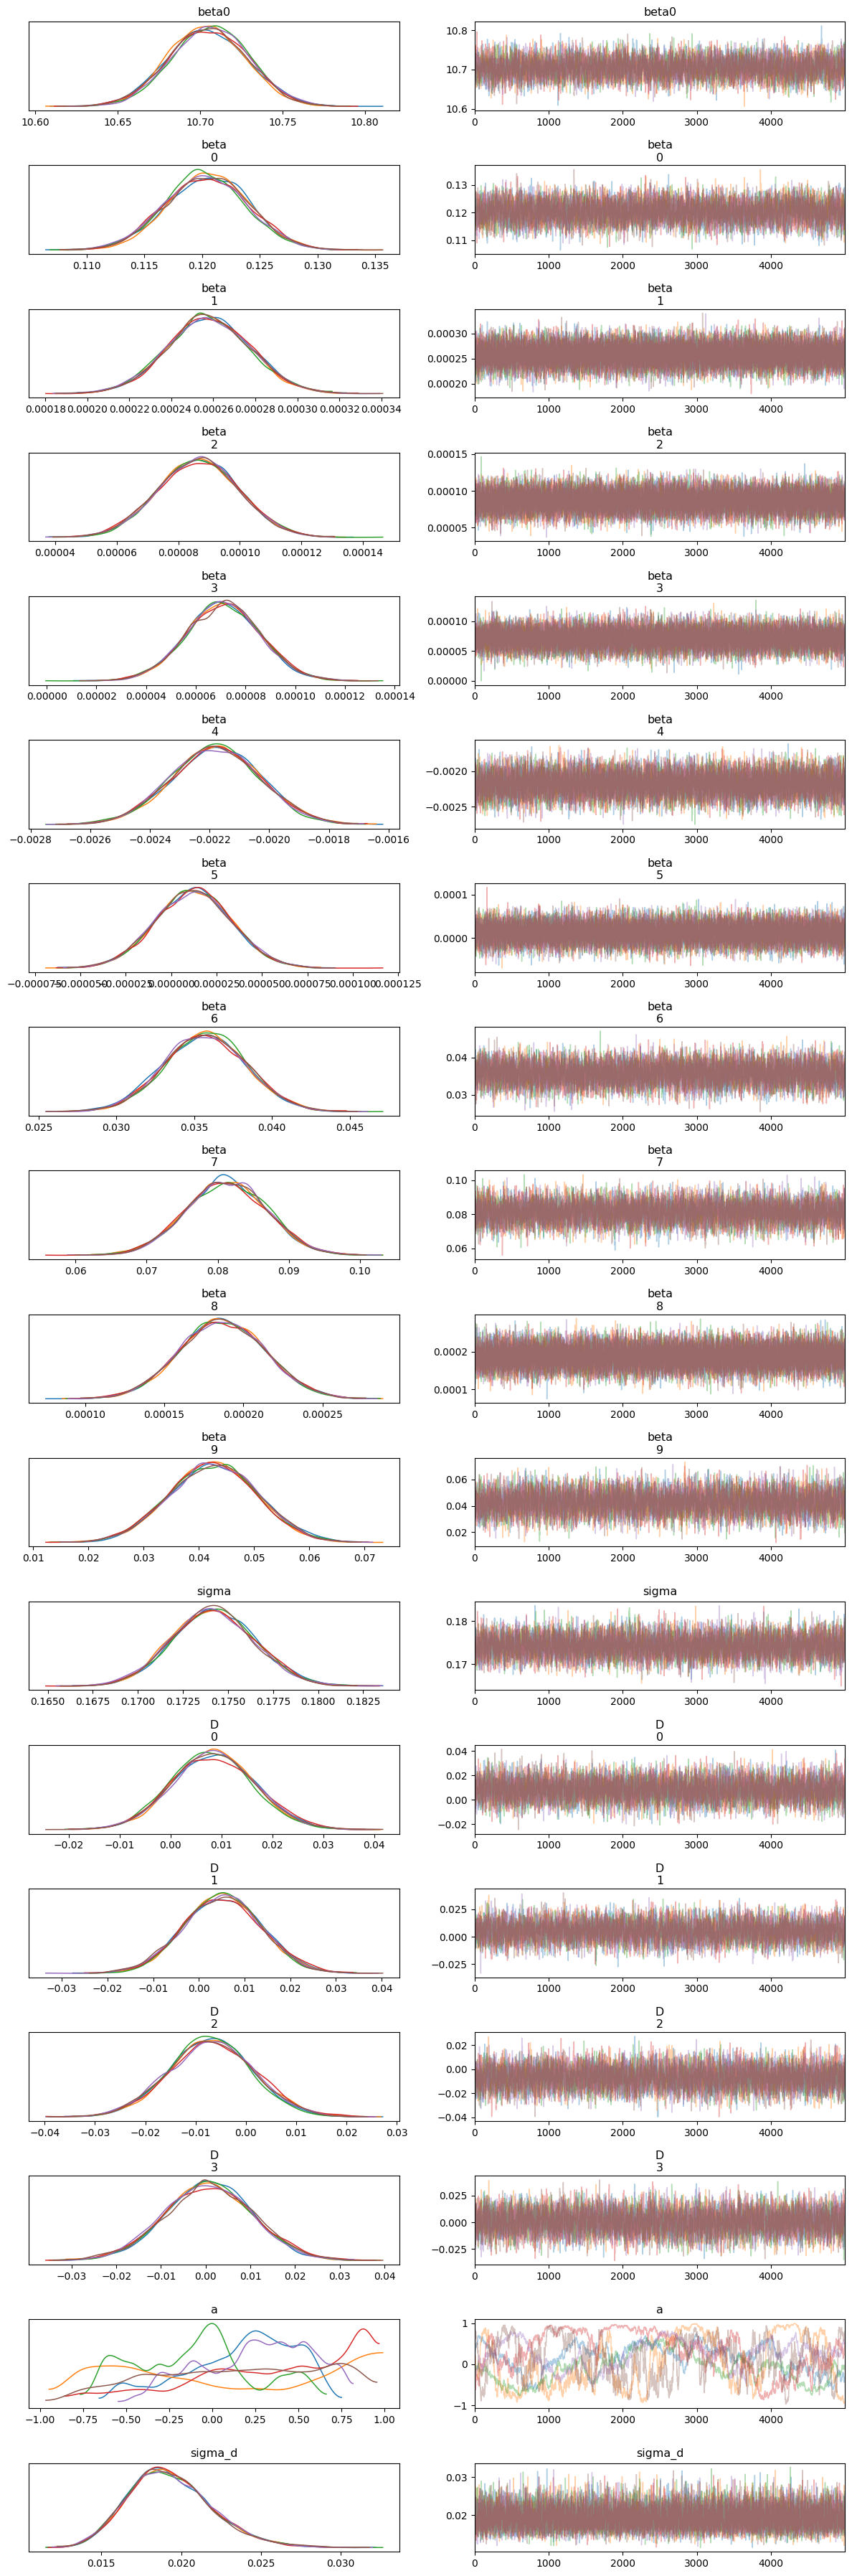

In [13]:
cmdstanpy_data = az.from_cmdstanpy(stan_fit)
az.plot_trace(cmdstanpy_data, compact=False)
plt.tight_layout()
#plt.savefig("pure-bsts.png")
plt.show()